In [9]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#importing the document
df = pd.read_csv('hasreal_Location.csv')

In [3]:
#displaying the first 5 columns
df.head()

,tweet_id,created_at,tweet,location,retweet,likes,source,Hashtags,Movie_Characters,Location_data,latitude,longitude
0,1376992630794547203,2021-03-30 20:20:01,Exclusive: Connie Nielsen Talks Zack Snyder’s ...,"Albuquerque, NM",0,0,Buffer,#tv #video #movies #entertainment,NaN,"(35.0843859, -106.650422)",35.084386,-106.650422
1,1376992549034979329,2021-03-30 20:19:41,Honest Trailers | Zack Snyder's Justice League...,No location,0,0,Twitter Web App,NaN,NaN,NaN,NaN,NaN
2,1376992406441189380,2021-03-30 20:19:07,Watching that new Zack Snyder's Justice League...,Glasgow,0,0,Twitter for iPhone,NaN,NaN,"(55.864237, -4.251806)",55.864237,-4.251806
3,1376992216808370181,2021-03-30 20:18:22,"Justice League are a man down because, Batman....",36°49′E / 1.283°S 36.817°E,0,0,Twitter for Android,NaN,batman,NaN,NaN,NaN
4,1376992071375056896,2021-03-30 20:17:47,I was on a podcast! 👍🏻 https://t.co/HX3x51Tswv,UK,0,0,Twitter for iPhone,NaN,NaN,"(55.378051, -3.435973)",55.378051,-3.435973


In [7]:
characters_list = df['Movie_Characters'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
characters = []
for item in characters_list:
    item = item.split()
    for i in item:
        characters.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(characters)
characters_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
characters_df.columns = ['Movie_Characters', 'Count']
characters_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Characters is: {characters_df.shape[0]}.')
#characters_df.head(10)

Total Number of Unique Characters is: 9.


In [8]:
characters_df['Percentage'] = 100*(characters_df['Count'] / characters_df['Count'].sum())
characters_df

,Movie_Characters,Count,Percentage
0,batman,3008,32.129887
4,superman,2707,28.914762
3,flash,1364,14.569536
1,cyborg,1007,10.756249
2,aquaman,706,7.541124
7,wonderwoman,280,2.990814
6,deathstroke,203,2.168340
5,amazons,64,0.683615
8,darkside,23,0.245674


In [20]:
characters_df2 =  characters_df[:5].copy()

In [21]:
characters_df2

,Movie_Characters,Count,Percentage
0,batman,3008,32.129887
4,superman,2707,28.914762
3,flash,1364,14.569536
1,cyborg,1007,10.756249
2,aquaman,706,7.541124


In [24]:
new_row = pd.DataFrame(data = {
    'Movie_Characters' : ['others'],
    'Count' : [characters_df['Count'][5:].sum()],
    'Percentage' :  [characters_df['Percentage'][5:].sum()]
})

#combining top 5 with others
characters_df2 = pd.concat([characters_df2, new_row])

In [25]:
characters_df2

,Movie_Characters,Count,Percentage
0,batman,3008,32.129887
4,superman,2707,28.914762
3,flash,1364,14.569536
1,cyborg,1007,10.756249
2,aquaman,706,7.541124
0,others,570,6.088443


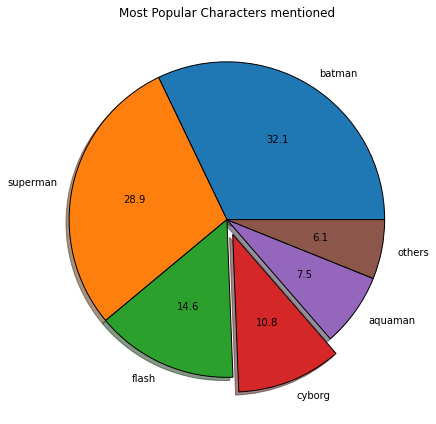

In [41]:
explode = [0, 0, 0, 0.1, 0, 0]
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
plt.pie(characters_df2['Count'], labels = characters_df2['Movie_Characters'], explode = explode,
        shadow = True, autopct = '%1.1f', wedgeprops = {'edgecolor' : 'black'})
plt.title('Most Popular Characters mentioned')
plt.tight_layout()
plt.show()